In [41]:
%matplotlib inline

import pandas as pd
import datetime 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
from matplotlib import rcParams
import glob
import os
import getpass
import sqlalchemy
#import geoalchemy2
import sys
#from shutil import copyfile
import platform

import random

import scipy

import pandas as pd
import geopandas as gpd

from datetime import datetime 
import statsmodels.api as sm

from pyproj import CRS
from pyproj import Transformer
from shapely.geometry import Point





#import wellapplication as wa

rcParams['figure.figsize'] = 12, 8

In [20]:
import sys
sys.path.append("../micromet")
import micromet
from micromet import AmerifluxDataProcessor


SyntaxError: invalid decimal literal (__init__.py, line 21)

In [72]:
subset

,RECORD,TIMESTAMP_START,TIMESTAMP_END,CO2,CO2_SIGMA,H2O,H2O_SIGMA,FC,FC_SSITC_TEST,LE,...,LW_OUT,P,CH4,FCH4,FCH4_SSITC_TEST,TS_1_1_2,SWC_1_1_2,Battery_Voltage,CO2_sig_strgth_Min,H2O_sig_strgth_Min
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,


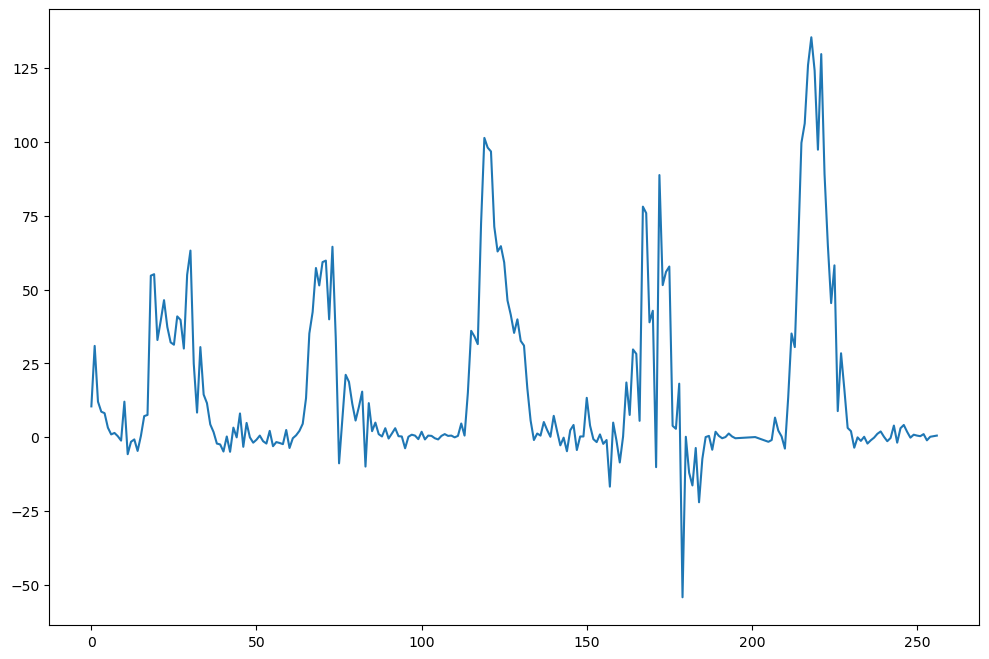

In [ ]:
data = pd.read_csv(r"C:\Users\paulinkenbrandt\Documents\GitHub\MicroMet\Notebooks\8441_Statistics_AmeriFlux_3.dat")
data = data[data['LE_1_1_2']<1000]
plt.plot(data['LE_1_1_2'])
subset = df[(df.index>('2025-03-21'))&(df['LE']<1000)]
subset['LE'].plot()

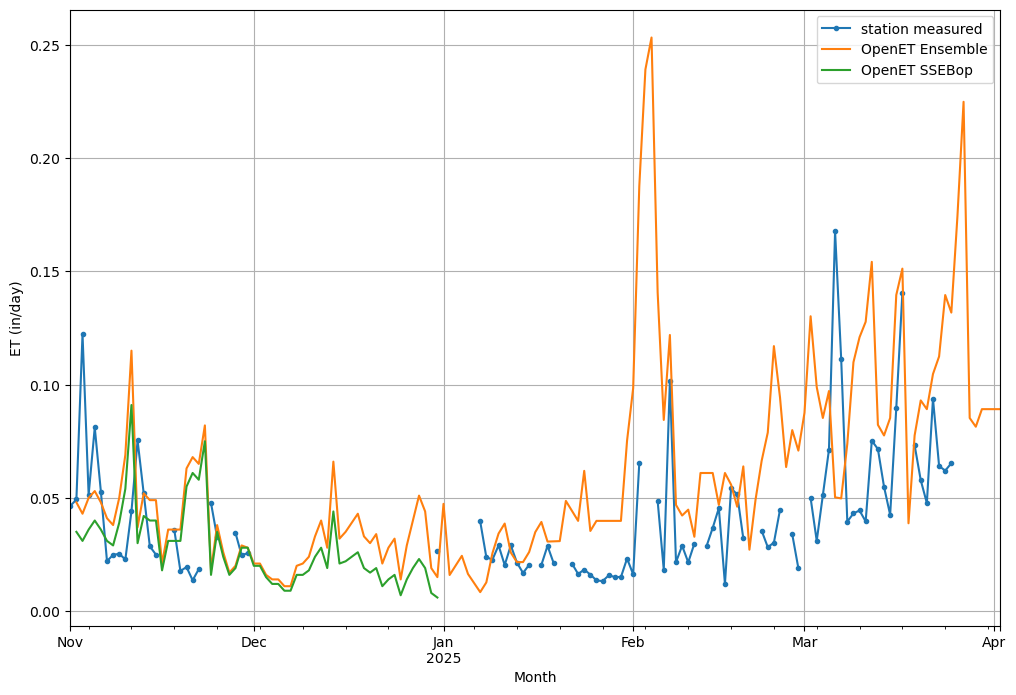

In [55]:
df = pd.read_csv("Phragmites_Flux_AmeriFluxFormat.dat",skiprows=[0,2,3],na_values=['NAN'])
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df = df.set_index(['TIMESTAMP'])
for col in ['CO2','H2O']:
    df[col] = pd.to_numeric(df[col])

oet = pd.read_csv("openet_phrag.csv",parse_dates=[0],index_col=0)
oet = oet[oet.index>'2024-11-01']

et_data = df[(df['ET']>0)&(df['ET']<1.5)]
et_data = et_data[et_data.index>'2024-11-01']
#oet = oet[oet.index>'2025-01-01']
# Resample by day and count values
df_count = et_data.resample('D').count()

# Resample by day and calculate the mean
df_resample = et_data.resample('D').sum()

# Apply the condition: if count < 3, set the resampled value to NaN
df_resample['ET'] = np.where(df_count['ET'] < 20, np.nan, df_resample['ET'])*0.0393701
df_resample['ET'].plot(marker='.', label ='station measured')
oet['Ensemble ET'].plot(label='OpenET Ensemble')
oet['SSEBop ET'].plot(label = 'OpenET SSEBop')
plt.grid()
plt.ylabel('ET (in/day)')
plt.legend()